In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to Change These)
covid = "covid-clinical-trial_data_cleandata.csv"

# Read Purchasing File and store into Pandas data frame
covid_df = pd.read_csv(covid)
covid_df.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,1-Jun-20,22-Jan-21,11-Jun-20,United States,NaN
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,21-Jul-20,13-Oct-20,30-Jun-20,United Kingdom,0.4891
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,22-May-20,23-Dec-20,24-Jun-20,Spain,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,20-Apr-20,16-Jul-20,21-Apr-20,Portugal,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,29-Sep-20,15-Apr-21,8-Oct-20,Pakistan,NaN


In [2]:
# Most popular clinical trials by enrollment
import numpy as np
enrollment_sort= covid_df.sort_values(by='Enrollment', ascending=False)
total_enrolled = enrollment_sort['Enrollment'].sum()
top_enrollment = enrollment_sort.head(4)
top_total = top_enrollment['Enrollment'].sum()
remaining = total_enrolled  - top_total
top_enrollment

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
42,43,NCT04331171,Epidemiological Observation From a Smartphone ...,Completed,No Results Available,COVID-19,Device: Web application users,To assess of the evolution of the number of ca...,All,"18 Years and older (Adult, Older Adult)",NaN,12000000,Other|Industry,Observational,17-Mar-20,15-Nov-20,2-Apr-20,France,NaN
259,260,NCT04460274,Forecast Number of Covid-19 Cases Worldwide,Completed,No Results Available,Covid-19,Other: Model Building|Other: Model validation,Number of Confirmed cases of Covid-19,All,"Child, Adult, Older Adult",NaN,7882471,Other,Observational,31-Dec-19,20-Jun-20,7-Jul-20,Turkey,NaN
792,793,NCT04407117,Appendicitis During the National Lockdown Duri...,Completed,No Results Available,Appendicitis,Behavioral: Lock-down and social distancing,Appendectomy|Postoperative length of stay|Mort...,All,"Child, Adult, Older Adult",NaN,6000000,Other,Observational,23-Mar-17,19-Apr-20,29-May-20,Denmark,NaN
890,891,NCT04891276,Impact of COVID-19 Infection and Confinement o...,Completed,No Results Available,Diabetic Subjects With Hospital Stays,Other: Data collection,Frequency of lower limb amputations,All,"Child, Adult, Older Adult",NaN,3300000,Other,Observational,16-Oct-20,14-Apr-21,18-May-21,France,NaN


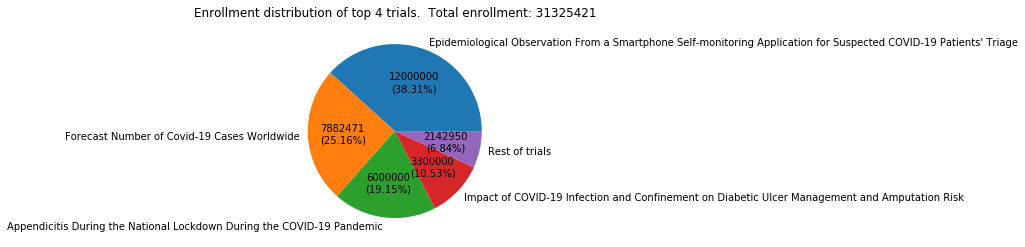

In [3]:
# Pie chart of most popular trial enrollment distribution 
values_enrollment = np.append(top_enrollment['Enrollment'].to_numpy(), remaining)
labels_enrollment = np.append(top_enrollment['Title'].to_numpy(), 'Rest of trials')
fig_enrollment, ax_enrollment = plt.subplots()

def fmt(x):
    return '{:.0f}\n({:.2f}%)'.format(total_enrolled*x/100, x)
    
ax_enrollment.pie(values_enrollment, labels=labels_enrollment, autopct=fmt)
plt.title(f'Enrollment distribution of top 4 trials.  Total enrollment: {total_enrolled}')
plt.show()

In [4]:
# Percentage of all 'has results' coming from trials other than the most popular above
all_has_result = enrollment_sort[enrollment_sort['Study Results'] == 'Has Results']
rest_has_results = enrollment_sort.tail(-4)[enrollment_sort.tail(-4)['Study Results'] == 'Has Results']
print(f"Percentage of all trials that 'have results' coming from the rest of trials: {(rest_has_results['Study Results'].count()/all_has_result['Study Results'].count()) * 100}%")
rest_has_results.head()

Percentage of all 'has results' coming from the rest of trials: 100.0%


,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
790,791,NCT04385238,Health and Wellbeing of Pregnant and Post-Part...,Completed,Has Results,COVID-19|Pregnancy Complications|Mental Health...,Other: This is an online survey with no interv...,Number of Participants With Symptoms of Post-t...,Female,"18 Years and older (Adult, Older Adult)",NaN,6894,Industry|Other,Observational,15-May-20,20-Jun-20,12-May-20,United States,NaN
118,119,NCT04292899,Study to Evaluate the Safety and Antiviral Act...,Completed,Has Results,COVID-19,Drug: Remdesivir|Drug: Standard of Care,Part A: Percentage of Participants in Each Cli...,All,"12 Years and older (Child, Adult, Older Adult)",Phase 3,4891,Industry,Interventional,6-Mar-20,30-Jun-20,3-Mar-20,United Kingdom,0.1563
1067,1068,NCT04634903,"Testing Scalable, Single-Session Interventions...",Completed,Has Results,Depression,Behavioral: Supportive Therapy SSI|Behavioral:...,Change in Adolescent Depressive Symptom Severi...,All,13 Years to 16 Years (Child),Not Applicable,2452,Other,Interventional,19-Nov-20,15-Mar-21,18-Nov-20,United States,NaN
1035,1036,NCT04308668,Post-exposure Prophylaxis / Preemptive Therapy...,Completed,Has Results,Corona Virus Infection|Acute Respiratory Distr...,Drug: Hydroxychloroquine|Other: Placebo,Number of Participants With Active COVID-19 Di...,All,"18 Years and older (Adult, Older Adult)",Phase 3,1312,Other,Interventional,17-Mar-20,20-May-20,16-Mar-20,Canada,NaN
123,124,NCT04292730,Study to Evaluate the Safety and Antiviral Act...,Completed,Has Results,COVID-19,Drug: Remdesivir|Drug: Standard of Care,Part A: Percentage of Participants in Each Cli...,All,"12 Years and older (Child, Adult, Older Adult)",Phase 3,1113,Industry,Interventional,15-Mar-20,26-Jun-20,3-Mar-20,United Kingdom,0.0174


In [5]:
# Enrollment statistics
enrollment = covid_df['Enrollment']
enrollment_mean = '{:.0f}'.format(enrollment.mean())
print(f"The mean participation is {enrollment_mean}")
enrollment_med = '{:.0f}'.format(enrollment.median())
print(f"The median participation is {enrollment_med}")
enrollment_std = '{:.0f}'.format(enrollment.std())
print(f"The std of enrollment is {enrollment_std}")

The mean participation is 27894
The median participation is 150
The std of enrollment is 474353


In [6]:
# Enrollment outliers
lowerq = enrollment.quantile(0.25)
upperq = enrollment.quantile(0.75)
iqr = upperq - lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr
enrollment_without_outliers = enrollment[(enrollment > lower_bound) & (enrollment < upper_bound)]
print("Enrollment with outliers removed")
enrollment_without_outliers.sort_values(ascending=False).head()

35     1033
423    1024
352    1017
904    1011
912    1011
Name: Enrollment, dtype: int64

Text(0.04, 0.5, 'Number of trials')

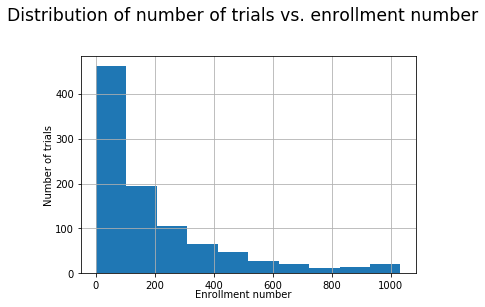

In [56]:
# Histogram of enrollment numbers after removing outliers
figure_enrollment_1, axes_enrollment_1 = plt.subplots()
enrollment_without_outliers.hist(bins=10, ax=axes_enrollment_1)
plt.suptitle('Distribution of number of trials vs. enrollment number', x=0.5, y=1.05, ha='center', fontsize='xx-large')
figure_enrollment_1.text(0.5, 0.04, 'Enrollment number', ha='center')
figure_enrollment_1.text(0.04, 0.5, 'Number of trials', va='center', rotation='vertical')

In [82]:
# The outliers of enrollment series lie very far away from rest of data
print(f"Total enrollment ({enrollment_without_outliers.sum()}) without ouliers is much less than any one outlier")


Total enrollment (195894) without ouliers is much less than any one outlier


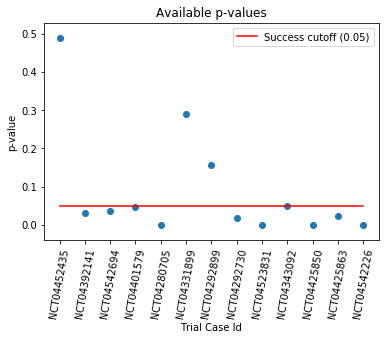

Available p-value trials plot with success cutoff


,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
12,13,NCT04392141,Colchicine Plus Phenolic Monoterpenes to Treat...,Completed,Has Results,COVID-19,Drug: Standard Treatment|Drug: Oral administra...,Mortality Rate|SpO2|Length of Hospitalization|...,All,"10 Years and older (Child, Adult, Older Adult)",Phase 1|Phase 2,120,Other,Interventional,1-Apr-20,1-Nov-20,18-May-20,Islamic Republic of,3.180000e-02
33,34,NCT04542694,Study of Favipiravir Compared to Standard of C...,Completed,Has Results,COVID-19,Drug: Favipiravir|Drug: Standard of care,Rate of Clinical Status Improvement|Time to Cl...,All,"18 Years to 80 Years (Adult, Older Adult)",Phase 3,200,Other,Interventional,21-May-20,20-Aug-20,9-Sep-20,Russian Federation,3.720000e-02
35,36,NCT04401579,Adaptive COVID-19 Treatment Trial 2 (ACTT-2),Completed,Has Results,COVID-19,Other: Placebo|Drug: Remdesivir|Drug: Baricitinib,Time to Recovery|Change From Baseline in Alani...,All,"18 Years to 99 Years (Adult, Older Adult)",Phase 3,1033,NIH,Interventional,8-May-20,31-Jul-20,26-May-20,United Kingdom,4.700000e-02
36,37,NCT04280705,Adaptive COVID-19 Treatment Trial (ACTT),Completed,Has Results,COVID-19,Other: Placebo|Drug: Remdesivir,Time to Recovery|Change From Baseline in Alani...,All,"18 Years to 99 Years (Adult, Older Adult)",Phase 3,1062,NIH,Interventional,21-Feb-20,21-May-20,21-Feb-20,United Kingdom,1.000000e-03
123,124,NCT04292730,Study to Evaluate the Safety and Antiviral Act...,Completed,Has Results,COVID-19,Drug: Remdesivir|Drug: Standard of Care,Part A: Percentage of Participants in Each Cli...,All,"12 Years and older (Child, Adult, Older Adult)",Phase 3,1113,Industry,Interventional,15-Mar-20,26-Jun-20,3-Mar-20,United Kingdom,1.740000e-02
274,275,NCT04523831,Clinical Trial of Ivermectin Plus Doxycycline ...,Completed,Has Results,Covid19,Drug: Ivermectin and Doxycycline|Drug: Standar...,Number of Patients With Early Clinical Improve...,All,"18 Years and older (Adult, Older Adult)",Phase 3,400,Other,Interventional,1-Jun-20,10-Sep-20,24-Aug-20,Bangladesh,1.000000e-03
292,293,NCT04343092,Effectiveness of Ivermectin as add-on Therapy ...,Completed,Has Results,COVID 19,Drug: Ivermectin (IVM),Number of Cured Patients|Time to Cure of COVID...,All,"18 Years and older (Adult, Older Adult)",Phase 1,16,Other,Interventional,18-Apr-20,1-Jun-20,13-Apr-20,Iraq,5.000000e-02
355,356,NCT04425850,USEFULNESS of Topic Ivermectin and Carrageenan...,Completed,Has Results,Covid19,Combination Product: Iota carrageenan nasal sp...,Number of Infected Subjects|Adverse Events Oth...,All,"18 Years and older (Adult, Older Adult)",NaN,229,Other,Observational,1-Jun-20,10-Aug-20,11-Jun-20,Argentina,1.000000e-04
905,906,NCT04425863,"Ivermectin, Aspirin, Dexamethasone and Enoxapa...",Completed,Has Results,Severe Acute Respiratory Syndrome|Ventilation ...,"Drug: Ivermectin 5 MG/ML oral solution, Aspiri...",Patients Who Improved Their Condition or Did N...,All,"5 Years and older (Child, Adult, Older Adult)",NaN,167,Other,Observational,1-May-20,30-Aug-20,11-Jun-20,Argentina,2.460000e-02
932,933,NCT04542226,Observational Open Study of Polyoxidonium in H...,Completed,Has Results,"Infections, Coronavirus",Drug: Polyoxidonium,Clinical Status of the Patient (According to 7...,All,"18 Years and older (Adult, Older Adult)",NaN,81,Industry,Observational,31-Mar-20,30-Oct-20,9-Sep-20,Russian Federation,1.000000e-07


In [85]:
# Available p-value trials plot with success cutoff 
pvalues = covid_df['p-values'].map(lambda x: str(x)).map(lambda x: x.replace('<','')).map(lambda x: float(x))
mapped_df = covid_df.copy(deep=True)
mapped_df['p-values'] = pvalues
mapped_df = mapped_df.dropna(subset=['p-values'])
x_axis_vals = range(1, pvalues.count() + 1)
cutoff = [0.05] * 13
xlabels = mapped_df['NCT Number']
plt.scatter(x_axis, mapped_df['p-values'])
plt.plot(x_axis, cutoff, 'r', label='Success cutoff (0.05)')
plt.xticks(np.arange(1,14), xlabels, rotation=80)
plt.title("Available p-values")
plt.xlabel("Trial Case Id")
plt.ylabel("p-value")
plt.legend(loc="upper right")
plt.show()
success_df = mapped_df[mapped_df['p-values'] <= 0.05]
print("Available p-value trials plot with success cutoff")
success_df